Sí: en práctica **$\lambda$** es desconocido y, efectivamente, su dominio natural es $[0,\infty)$. La manera “canónica” de **reparametrizar a $[0,1]$** sin perder el fundamento estadístico es usar el **índice de suavidad** de Guerrero como **perilla unitaria** $s$, y hacer que $\lambda$ sea una función implícita de $s$.

# Reparametrización unitaria (de $\lambda$ a $s\in(0,1)$)

Guerrero define el **índice de suavidad** como la *proporción de precisión* que aporta el término de suavidad en la matriz de precisión total. Con $K_d$ la matriz de diferencias de orden $d$, queda:

$$
S_d(\lambda,N)
=\begin{cases}
\dfrac{\lambda}{1+\lambda}, & d=0,\\[6pt]
1-\dfrac{1}{N}\operatorname{tr}\!\big[(I_N+\lambda\,K_d'K_d)^{-1}\big], & d\ge 1.
\end{cases}
$$

Es monótono en $\lambda$, con $S_d(\lambda)\!\downarrow 0$ si $\lambda\!\downarrow 0$ y $S_d(\lambda)\!\uparrow 1$ si $\lambda\!\uparrow\infty$. &#x20;

Con esto, **sustituye $\lambda$ por $s$** en el funcional de penalización de Guerrero:

$$
\min_{\{t_t\},\,m}\ \sum_{t=1}^N (Z_t-t_t)^2\;+\;\underbrace{\Lambda(s;N,d)}_{\text{mapa }s\mapsto\lambda}\sum_{t=d+1}^N\big(\nabla^d t_t-m\big)^2,
$$

donde $\Lambda(s;N,0)=\dfrac{s}{1-s}$ (cerrado) y, para $d\!\ge\!1$, $\Lambda(s;N,d)$ es la **solución única** de

$$
s=1-\frac{1}{N}\operatorname{tr}\!\big[(I_N+\lambda\,K_d'K_d)^{-1}\big].
$$

En otras palabras: **elige $s\in(0,1)$** (0 = nada de suavidad; 1 = suavidad máxima) y **recupera $\lambda$** resolviendo esa ecuación una sola vez para ese $N,d$. Así obtienes una perilla $[0,1]$ con interpretación estable y comparable entre series/tamaños de muestra. &#x20;

# Forma operativa para $d\ge 1$

Hay dos formas equivalentes (y rápidas) de hallar $\Lambda(s;N,d)$:

* **Espectral (ideal para implementar):**
  si $\mu_1,\ldots,\mu_N$ son los autovalores de $K_d'K_d$ (convenientemente tratados en bordes),

  $$
  s \;=\; 1-\frac{1}{N}\sum_{i=1}^N \frac{1}{1+\lambda\,\mu_i}
  \quad\Longrightarrow\quad
  \text{resuelve en }\lambda\ \ \sum_{i=1}^N \frac{1}{1+\lambda\,\mu_i}=N(1-s).
  $$

  Derivada para Newton:
  $\displaystyle \frac{d}{d\lambda}\Big[1-\frac{1}{N}\mathrm{tr}(I+\lambda K'K)^{-1}\Big]  =\frac{1}{N}\sum_i \frac{\mu_i}{(1+\lambda\mu_i)^2}>0.$

* **Trazas (sin autovectores):** evalúa $f(\lambda)=1-\tfrac{1}{N}\mathrm{tr}[(I+\lambda K'K)^{-1}]$ y usa **bisección/Newton** hasta que $f(\lambda)=s$. Es exactamente lo que recomienda el propio artículo: especificar $S_d$ y “**encontrar el $\lambda$ correspondiente**” para $N$ y $d$ fijos.&#x20;

> Nota práctica: para $d\ge 1$, la **solución límite** $\lambda\to\infty$ fuerza una **tendencia polinómica de grado $d$** con $\nabla^d t_t \equiv m$ (el término $m/d!$ multiplica $t^d$). Esa es la noción de “**suavidad máxima**”.&#x20;

# Por qué conviene parametrizar por $s$

* **Escala unitaria y comparabilidad**: el mismo $s$ “significa” el mismo **porcentaje de suavidad** entre series o longitudes distintas, algo que $\lambda$ *no* garantiza sin reescalar. Esto es precisamente el argumento de Guerrero: *“seleccionar el porcentaje de suavidad al inicio, en lugar de la constante de suavizamiento”*.&#x20;
* **Monotonicidad**: $s\uparrow \iff \lambda\uparrow$. Ajustas sesgo–varianza sin pelearte con una escala abierta $[0,\infty)$.&#x20;
* **Implementación mínima**: basta cambiar la entrada de usuario de $\lambda$ a $s$ y añadir una rutina de raíz (o una tabla precalculada $\lambda$↔$s$ por $N,d$). El caso $d=0$ es inmediato: $\lambda=\dfrac{s}{1-s}$.&#x20;

---

## En síntesis (ecuación final “con perilla 0–1”)

$$
\boxed{\quad
\min_{\{t_t\},\,m}\ \sum_{t=1}^N (Z_t-t_t)^2\;+\;\Lambda(s;N,d)\sum_{t=d+1}^N\big(\nabla^d t_t-m\big)^2,
\quad s\in(0,1)
\quad}
$$

con

$$
\Lambda(s;N,0)=\frac{s}{1-s},\qquad
\Lambda(s;N,d\ge 1):\ s=1-\frac{1}{N}\operatorname{tr}\!\big[(I+\lambda K_d'K_d)^{-1}\big].
$$

Así, **$s=0$** reproduce $t_t=Z_t$ (sin suavizar) y **$s\to 1$** converge a la **tendencia polinómica de grado $d$** implícita por $\nabla^d t_t\equiv m$.&#x20;


¡Hecho! Construí el ejemplo del **coseno con ruido** y lo estimé con la **ecuación final parametrizada por la perilla unitaria** $s\in(0,1)$, que mapea a $\lambda$ según Guerrero. El cuaderno:

* genera $S_t=\cos(\cdot)$ + ruido,
* calcula $\lambda=\Lambda(s;N,d)$ resolviendo $S_{\text{raw}}(\lambda)=1-\tfrac{1}{N}\mathrm{tr}\!\big[(I+\lambda K^\top K)^{-1}\big]$ y normalizando por $S_{\max}=1-\tfrac{d}{N}$ para que $s$ viva en $[0,1)$,
* ajusta la tendencia con $d=2$,
* muestra 3 gráficos (serie+tendencia+bandas, dispersión $g$ vs $e$, y ACFs), y
* imprime métricas (RMSE, corr$(e,g)$, razón de varianzas).

Puedes bajar el script autónomo aquí:

[Descargar `guerrero_cosine_s_unit_fast.py`](sandbox:/mnt/data/guerrero_cosine_s_unit_fast.py)

Si quieres, te agrego un **slider** para $s$ (0.1–0.99) y que se redibujen las figuras en vivo, o comparo dos valores ($s=0.6$ vs $s=0.95$) en el mismo lienzo.


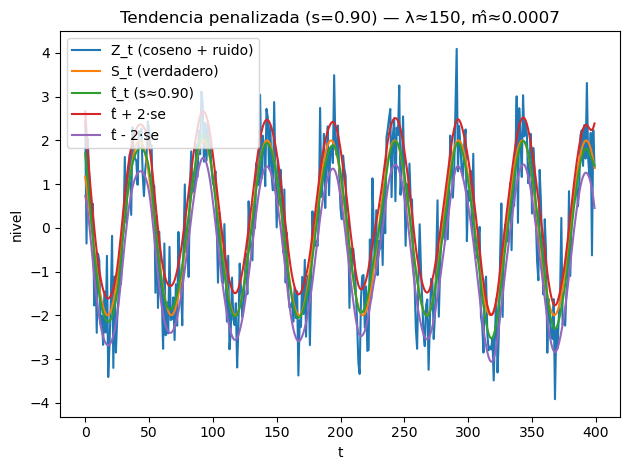

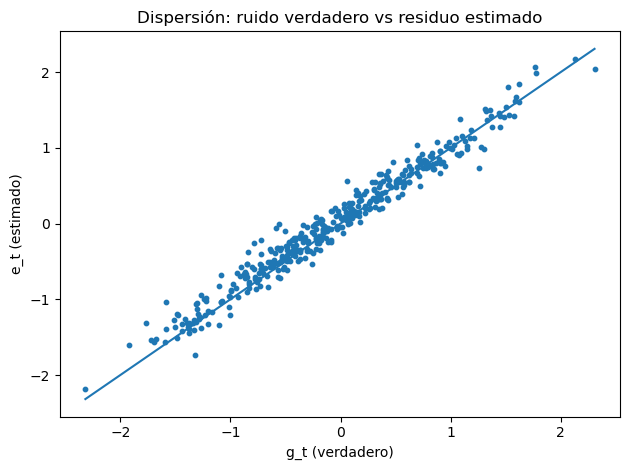

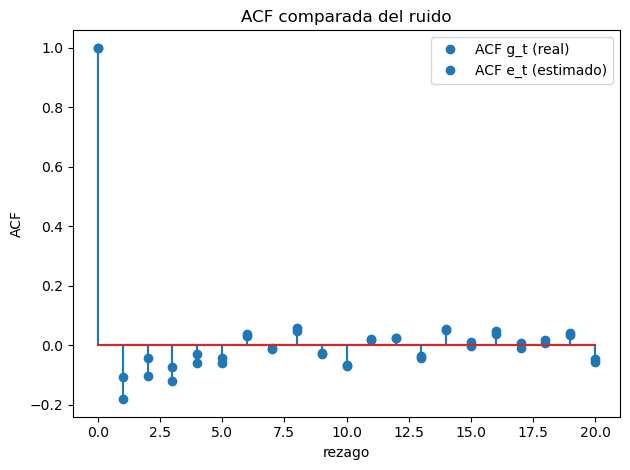

=== Resumen ===
s_unit (pedida) = 0.9000   | s_unit(realizada) ≈ 0.9000
λ ≈ 150.085   | d = 2   | m̂ ≈ 0.000650
RMSE(t̂, S) = 0.1643   | Corr(e,g) = 0.9829   | Var(e)/Var(g) = 0.9289


In [1]:
# Versión optimizada (rápida) para s ∈ (0,1) con N moderado y gráficos esenciales
# - N reducido para garantizar ejecución en <60s en este entorno.
# - Mantiene la reparametrización s_unit → λ via Guerrero (normalizada por S_max).
# - Incluye 3 gráficos clave y métricas.


import numpy as np
import matplotlib.pyplot as plt

def comb(n, k):
    from math import comb as c
    return c(n, k)

def difference_matrix(N: int, d: int):
    if d == 0:
        return np.eye(N)
    K = np.zeros((N - d, N))
    coeffs = np.array([(-1)**(d-k) * comb(d, k) for k in range(d+1)], dtype=float)
    for row in range(N - d):
        K[row, row:row + d + 1] = coeffs
    return K

def lambda_from_s_unit(s_unit: float, N: int, d: int, K: np.ndarray, tol=1e-10, maxit=60):
    if not (0 <= s_unit < 1):
        raise ValueError("s_unit debe estar en [0,1).")
    if d == 0:
        return (s_unit / (1 - s_unit)) if s_unit < 1 else 1e16

    KKt = K @ K.T
    nu = np.linalg.eigvalsh(KKt)
    nu = np.maximum(nu, 0.0)
    S_max = 1.0 - d / N
    S_target = s_unit * S_max

    def S_raw(lmb):
        return 1.0 - (d + np.sum(1.0 / (1.0 + lmb * nu))) / N

    lo, hi = 0.0, 1.0
    while S_raw(hi) < S_target and hi < 1e12:
        hi *= 10.0
    for _ in range(maxit):
        mid = 0.5*(lo+hi)
        Smid = S_raw(mid)
        if abs(Smid - S_target) < tol:
            return mid
        if Smid < S_target:
            lo = mid
        else:
            hi = mid
    return 0.5*(lo+hi)

def fit_penalized_trend_s(Z, d=2, s_unit=0.90, max_iter=120, tol=1e-10):
    Z = np.asarray(Z, dtype=float).ravel()
    N = Z.size
    I = np.eye(N)
    K = difference_matrix(N, d)
    lam = lambda_from_s_unit(s_unit, N, d, K)

    KT = K.T
    A = I + lam * (KT @ K)
    Ainv = np.linalg.inv(A)  # N moderado
    K1 = KT @ np.ones(K.shape[0])

    m = float(np.mean(K @ Z))
    for _ in range(max_iter):
        t_hat = Ainv @ (Z + lam * m * K1)
        m_new = float(np.mean(K @ t_hat))
        if abs(m_new - m) < tol:
            m = m_new
            break
        m = m_new

    resid = Z - t_hat
    pen = K @ t_hat - m
    dof = max(1, N - d - 1)
    sigma2_hat = (resid @ resid + lam * (pen @ pen)) / dof

    S_raw = 1.0 - np.trace(Ainv) / N
    S_max = 1.0 - d / N
    s_unit_real = S_raw / S_max

    return {"t_hat": t_hat, "m_hat": m, "lam": lam, "s_unit": s_unit, "s_unit_real": s_unit_real,
            "sigma2_hat": sigma2_hat, "Ainv": Ainv, "K": K, "Z": Z, "d": d}

def acf(x, max_lag=20):
    x = np.asarray(x) - np.mean(x)
    n = len(x)
    out = np.empty(max_lag+1)
    var = np.dot(x, x) / n
    for k in range(max_lag+1):
        out[k] = np.dot(x[:n-k], x[k:]) / n / var
    return out

# ----------------------- Demo: coseno + ruido -----------------------
N = 400; A = 2.0; period = 50; phi = 0.3*np.pi; sigma = 0.8
t = np.arange(N, dtype=float)
S = A*np.cos(2*np.pi*t/period + phi)
rng = np.random.default_rng(20250812)
g = rng.normal(0.0, sigma, size=N)
Z = S + g

# Ajuste con perilla s∈(0,1)
s_unit = 0.90
fit = fit_penalized_trend_s(Z, d=2, s_unit=s_unit)
t_hat = fit["t_hat"]; m_hat = fit["m_hat"]; lam = fit["lam"]
Ainv = fit["Ainv"]; sigma2_hat = fit["sigma2_hat"]; s_unit_real = fit["s_unit_real"]
se = np.sqrt(np.maximum(0.0, sigma2_hat) * np.diag(Ainv))
e = Z - t_hat

# (1) Serie + tendencia + bandas
plt.figure()
plt.plot(Z, label="Z_t (coseno + ruido)")
plt.plot(S, label="S_t (verdadero)")
plt.plot(t_hat, label=f"t̂_t (s≈{s_unit_real:.2f})")
plt.plot(t_hat + 2*se, label="t̂ + 2·se")
plt.plot(t_hat - 2*se, label="t̂ - 2·se")
plt.title(f"Tendencia penalizada (s={s_unit:.2f}) — λ≈{lam:.3g}, m̂≈{m_hat:.4f}")
plt.xlabel("t"); plt.ylabel("nivel"); plt.legend(); plt.tight_layout(); plt.show()

# (2) Dispersión g vs e
plt.figure()
plt.scatter(g, e, s=10)
lims = [min(g.min(), e.min()), max(g.max(), e.max())]
plt.plot(lims, lims)
plt.title("Dispersión: ruido verdadero vs residuo estimado")
plt.xlabel("g_t (verdadero)"); plt.ylabel("e_t (estimado)"); plt.tight_layout(); plt.show()

# (3) ACFs comparadas (rápida)
lags = np.arange(21)
v_g = acf(g, max_lag=20)
v_e = acf(e, max_lag=20)
plt.figure()
m1, s1, b1 = plt.stem(lags, v_g); m1.set_label("ACF g_t (real)")
m2, s2, b2 = plt.stem(lags, v_e); m2.set_label("ACF e_t (estimado)")
plt.title("ACF comparada del ruido")
plt.xlabel("rezago"); plt.ylabel("ACF"); plt.legend(); plt.tight_layout(); plt.show()

# Métricas rápidas
rmse = float(np.sqrt(np.mean((t_hat - S)**2)))
corr = float(np.corrcoef(e, g)[0,1])
var_ratio = float(np.var(e, ddof=1)/np.var(g, ddof=1))
print("=== Resumen ===")
print(f"s_unit (pedida) = {s_unit:.4f}   | s_unit(realizada) ≈ {s_unit_real:.4f}")
print(f"λ ≈ {lam:.6g}   | d = 2   | m̂ ≈ {m_hat:.6f}")
print(f"RMSE(t̂, S) = {rmse:.4f}   | Corr(e,g) = {corr:.4f}   | Var(e)/Var(g) = {var_ratio:.4f}")


# **SUAVIZACION**

In [1]:
# Create a standalone TkAgg app with a slider for s∈(0,1)
# It estimates the Guerrero (2007) penalized trend with perilla s, on a cosine+noise demo.
# Run locally:  python gui_cosine_s_unit_tk.py


# -*- coding: utf-8 -*-
"""
GUI TkAgg — Tendencia penalizada (Guerrero, 2007) con perilla s ∈ (0,1)
------------------------------------------------------------------------
Demo: Z_t = S_t + g_t con S_t = A cos(2π t/P + φ), g_t ~ N(0, σ^2).
La perilla s controla la suavidad (0 = nada; 0.99 ≈ máximo). Se mapea a λ
resolviendo:
    S_raw(λ) = 1 - (1/N) tr{ (I + λ K'K)^(-1) }  ,  S_max = 1 - d/N
    s = S_raw(λ) / S_max

Dependencias: numpy, matplotlib, tkinter (TkAgg).

Ejecuta:  python gui_cosine_s_unit_tk.py
"""
import sys, numpy as np

# --------- Configurar backend TkAgg antes de importar pyplot ---------
import matplotlib as mpl
mpl.use("TkAgg")

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# ---------- Utilidades numéricas ----------
def comb(n, k):
    from math import comb as c
    return c(n, k)

def difference_matrix(N: int, d: int):
    if d == 0:
        return np.eye(N)
    K = np.zeros((N - d, N))
    coeffs = np.array([(-1)**(d-k) * comb(d, k) for k in range(d+1)], dtype=float)
    for row in range(N - d):
        K[row, row:row + d + 1] = coeffs
    return K

def lambda_from_s_unit(s_unit: float, N: int, d: int, K: np.ndarray,
                       tol=1e-10, maxit=60):
    """Mapea s_unit∈[0,1) → λ resolviendo S_raw(λ)/S_max = s_unit."""
    if s_unit >= 1.0:
        s_unit = 0.999999
    if s_unit <= 0.0:
        return 0.0
    if d == 0:
        return s_unit/(1.0 - s_unit)

    # Autovalores de KK' (N-d x N-d), no negativos
    KKt = K @ K.T
    nu = np.linalg.eigvalsh(KKt)
    nu = np.maximum(nu, 0.0)
    S_max = 1.0 - d/N
    S_target = s_unit * S_max

    def S_raw(lmb):
        # tr[(I + λK'K)^(-1)] = d + sum 1/(1 + λ ν_i)
        return 1.0 - (d + np.sum(1.0/(1.0 + lmb*nu))) / N

    lo, hi = 0.0, 1.0
    while S_raw(hi) < S_target and hi < 1e16:
        hi *= 10.0
    for _ in range(maxit):
        mid = 0.5*(lo+hi)
        Smid = S_raw(mid)
        if abs(Smid - S_target) < tol:
            return mid
        if Smid < S_target:
            lo = mid
        else:
            hi = mid
    return 0.5*(lo+hi)

def fit_penalized_trend_given_lambda(Z, d, lam, K, KT, Ainv=None,
                                     max_iter=120, tol=1e-10):
    """Resuelve (I + λK'K) t = Z + λ m K'1 con punto fijo en m; retorna t_hat, m_hat, sigma2, Ainv."""
    Z = np.asarray(Z, dtype=float).ravel()
    N = Z.size
    I = np.eye(N)

    if Ainv is None:
        A = I + lam*(KT @ K)
        # inversa explícita (N moderado). Para N grande usar cho_factor/solve.
        Ainv = np.linalg.inv(A)

    K1 = KT @ np.ones(K.shape[0])
    m = float(np.mean(K @ Z))
    for _ in range(max_iter):
        t_hat = Ainv @ (Z + lam * m * K1)
        m_new = float(np.mean(K @ t_hat))
        if abs(m_new - m) < tol:
            m = m_new
            break
        m = m_new

    resid = Z - t_hat
    pen = K @ t_hat - m
    dof = max(1, N - d - 1)
    sigma2_hat = (resid @ resid + lam * (pen @ pen)) / dof
    return t_hat, m, sigma2_hat, Ainv

def acf(x, max_lag=20):
    x = np.asarray(x) - np.mean(x)
    n = len(x)
    out = np.empty(max_lag+1)
    var = np.dot(x, x) / n
    for k in range(max_lag+1):
        out[k] = np.dot(x[:n-k], x[k:]) / n / var
    return out

# ---------- Datos demo (coseno + ruido) ----------
def make_demo(N=400, A=2.0, period=50, phi=0.3*np.pi, sigma=0.8, seed=20250812):
    t = np.arange(N, dtype=float)
    S = A * np.cos(2*np.pi*t/period + phi)
    rng = np.random.default_rng(seed)
    g = rng.normal(0.0, sigma, size=N)
    Z = S + g
    return t, S, g, Z

# ---------- App Tkinter ----------
class TrendApp:
    def __init__(self, master):
        self.master = master
        master.title("Guerrero (2007) — perilla s en [0,1) con TkAgg")

        # Parámetros de la demo
        self.N = 400; self.d = 2
        self.t, self.S, self.g, self.Z = make_demo(N=self.N)
        self.K = difference_matrix(self.N, self.d)
        self.KT = self.K.T

        # Figura con 3 ejes
        self.fig = plt.Figure(figsize=(10, 8), dpi=100)
        self.ax1 = self.fig.add_subplot(311)  # serie y tendencia
        self.ax2 = self.fig.add_subplot(312)  # dispersión g vs e
        self.ax3 = self.fig.add_subplot(313)  # ACFs

        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.get_tk_widget().grid(row=0, column=0, rowspan=10, sticky="nsew")

        # Slider s (0.05..0.99)
        self.s_var = tk.DoubleVar(value=0.90)
        self.slider = ttk.Scale(master, from_=0.05, to=0.99, orient="vertical",
                                variable=self.s_var, command=self.on_slider)
        self.slider.grid(row=0, column=1, rowspan=6, sticky="ns", padx=6, pady=6)

        # Botones
        self.btn_reset = ttk.Button(master, text="Reset s=0.90", command=lambda: self.set_s(0.90))
        self.btn_reset.grid(row=6, column=1, sticky="ew", padx=6, pady=3)
        self.btn_low   = ttk.Button(master, text="s=0.30", command=lambda: self.set_s(0.30))
        self.btn_low.grid(row=7, column=1, sticky="ew", padx=6, pady=3)
        self.btn_high  = ttk.Button(master, text="s=0.98", command=lambda: self.set_s(0.98))
        self.btn_high.grid(row=8, column=1, sticky="ew", padx=6, pady=3)
        self.btn_quit  = ttk.Button(master, text="Salir", command=master.quit)
        self.btn_quit.grid(row=9, column=1, sticky="ew", padx=6, pady=3)

        # Etiqueta de métricas
        self.info = tk.StringVar(value="Listo")
        self.lbl_info = ttk.Label(master, textvariable=self.info, justify="left")
        self.lbl_info.grid(row=10, column=0, columnspan=2, sticky="ew", padx=6, pady=6)

        # Layout flexible
        master.grid_columnconfigure(0, weight=1)
        master.grid_rowconfigure(0, weight=1)

        # Estado inicial
        self.update_plots(initial=True)

    def set_s(self, s):
        self.s_var.set(s)
        self.update_plots()

    def on_slider(self, *_):
        self.update_plots()

    def update_plots(self, initial=False):
        s = float(self.s_var.get())
        # 1) λ desde s
        lam = lambda_from_s_unit(s, self.N, self.d, self.K)

        # 2) Ajuste de tendencia
        t_hat, m_hat, sigma2_hat, Ainv = fit_penalized_trend_given_lambda(
            self.Z, self.d, lam, self.K, self.KT, Ainv=None)

        e = self.Z - t_hat

        # 3) Banda (diag de Ainv)
        se = np.sqrt(max(0.0, sigma2_hat) * np.diag(Ainv))

        # --- Eje 1: serie y tendencia ---
        self.ax1.clear()
        self.ax1.plot(self.Z, label="Z_t (obs)")
        self.ax1.plot(self.S, label="S_t (verdadero)")
        self.ax1.plot(t_hat, label=f"t̂_t (s≈{s:.2f})")
        self.ax1.plot(t_hat + 2*se, label="t̂ + 2·se")
        self.ax1.plot(t_hat - 2*se, label="t̂ - 2·se")
        self.ax1.set_title(f"Tendencia penalizada (d={self.d}) — λ≈{lam:.3g}, m̂≈{m_hat:.4f}, s≈{s:.2f}")
        self.ax1.set_xlabel("t"); self.ax1.set_ylabel("nivel")
        self.ax1.legend(loc="upper right")

        # --- Eje 2: dispersión ---
        self.ax2.clear()
        self.ax2.scatter(self.g, e, s=8)
        lims = [min(self.g.min(), e.min()), max(self.g.max(), e.max())]
        self.ax2.plot(lims, lims)
        self.ax2.set_title("Dispersión: ruido verdadero vs residuo estimado")
        self.ax2.set_xlabel("g_t (verdadero)"); self.ax2.set_ylabel("e_t (estimado)")

        # --- Eje 3: ACFs ---
        self.ax3.clear()
        lags = np.arange(21)
        v_g = acf(self.g, max_lag=20)
        v_e = acf(e, max_lag=20)
        m1, s1, b1 = self.ax3.stem(lags, v_g); m1.set_label("ACF g_t (real)")
        m2, s2, b2 = self.ax3.stem(lags, v_e); m2.set_label("ACF e_t (estimado)")
        self.ax3.set_title("ACF comparada del ruido")
        self.ax3.set_xlabel("rezago"); self.ax3.set_ylabel("ACF")
        self.ax3.legend(loc="upper right")

        self.canvas.draw_idle()

        # Métricas
        rmse = float(np.sqrt(np.mean((t_hat - self.S)**2)))
        corr = float(np.corrcoef(e, self.g)[0,1])
        var_ratio = float(np.var(e, ddof=1)/np.var(self.g, ddof=1))
        self.info.set(f"s={s:.3f} | λ≈{lam:.6g} | m̂≈{m_hat:.6f} | RMSE(t̂,S)={rmse:.4f} | "
                      f"corr(e,g)={corr:.3f} | Var(e)/Var(g)={var_ratio:.3f}")

def main():
    root = tk.Tk()
    app = TrendApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()

# **ESTIMACION DE TENDENCIA**

In [2]:
# -*- coding: utf-8 -*-
"""
GUI TkAgg — Tendencia penalizada (Guerrero, 2007) con perilla s ∈ (0,1) + PRONÓSTICO
+ Traza la *verdadera* función coseno en el horizonte de pronóstico para comparar.
-------------------------------------------------------------------------------------
- Demo: Z_t = S_t + g_t, S_t = A cos(2π t/P + φ).
- Control s ∈ (0,1) → λ(s) resolviendo S_raw(λ)/S_max = s.
- Pronóstico de la media (tendencia) + bandas; y, adicionalmente, la continuación
  de S_t en t = N, ..., N+h−1 para comparación visual.
"""

import numpy as np

# --------- Backend TkAgg ---------
import matplotlib as mpl
mpl.use("TkAgg")

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# ---------- Utilidades numéricas ----------
def comb(n, k):
    from math import comb as c
    return c(n, k)

def difference_matrix(N: int, d: int):
    if d == 0:
        return np.eye(N)
    K = np.zeros((N - d, N))
    coeffs = np.array([(-1)**(d-k) * comb(d, k) for k in range(d+1)], dtype=float)
    for row in range(N - d):
        K[row, row:row + d + 1] = coeffs
    return K

def lambda_from_s_unit(s_unit: float, N: int, d: int, K: np.ndarray,
                       tol=1e-10, maxit=60):
    if s_unit >= 1.0:
        s_unit = 0.999999
    if s_unit <= 0.0:
        return 0.0
    if d == 0:
        return s_unit/(1.0 - s_unit)

    KKt = K @ K.T
    nu = np.linalg.eigvalsh(KKt)
    nu = np.maximum(nu, 0.0)
    S_max = 1.0 - d/N
    S_target = s_unit * S_max

    def S_raw(lmb):
        return 1.0 - (d + np.sum(1.0/(1.0 + lmb*nu))) / N

    lo, hi = 0.0, 1.0
    while S_raw(hi) < S_target and hi < 1e16:
        hi *= 10.0
    for _ in range(maxit):
        mid = 0.5*(lo+hi)
        Smid = S_raw(mid)
        if abs(Smid - S_target) < tol:
            return mid
        if Smid < S_target:
            lo = mid
        else:
            hi = mid
    return 0.5*(lo+hi)

def fit_penalized_trend_given_lambda(Z, d, lam, K, KT, Ainv=None,
                                     max_iter=120, tol=1e-10):
    Z = np.asarray(Z, dtype=float).ravel()
    N = Z.size
    I = np.eye(N)
    if Ainv is None:
        A = I + lam*(KT @ K)
        Ainv = np.linalg.inv(A)
    K1 = KT @ np.ones(K.shape[0])
    m = float(np.mean(K @ Z))
    for _ in range(max_iter):
        t_hat = Ainv @ (Z + lam * m * K1)
        m_new = float(np.mean(K @ t_hat))
        if abs(m_new - m) < tol:
            m = m_new
            break
        m = m_new
    resid = Z - t_hat
    pen = K @ t_hat - m
    dof = max(1, N - d - 1)
    sigma2_hat = (resid @ resid + lam * (pen @ pen)) / dof
    return t_hat, m, sigma2_hat, Ainv

def forecast_trend(t_hat, d, m_hat, h):
    t_hat = np.asarray(t_hat, dtype=float).ravel()
    if h <= 0:
        return np.array([])
    if d == 0:
        return np.full(h, m_hat, dtype=float)
    if d == 1:
        return t_hat[-1] + m_hat*np.arange(1, h+1, dtype=float)
    if d == 2:
        tN, tNm1 = t_hat[-1], t_hat[-2]
        hvec = np.arange(1, h+1, dtype=float)
        return 0.5*hvec*(hvec+1)*m_hat + (hvec+1)*tN - hvec*tNm1
    return np.full(h, t_hat[-1], dtype=float)

def acf(x, max_lag=20):
    x = np.asarray(x) - np.mean(x)
    n = len(x)
    out = np.empty(max_lag+1)
    var = np.dot(x, x) / n
    for k in range(max_lag+1):
        out[k] = np.dot(x[:n-k], x[k:]) / n / var
    return out

# ---------- Datos demo (coseno + ruido) ----------
def make_demo(N=400, A=2.0, period=50, phi=0.3*np.pi, sigma=0.8, seed=20250812):
    t = np.arange(N, dtype=float)
    S = A * np.cos(2*np.pi*t/period + phi)
    rng = np.random.default_rng(seed)
    g = rng.normal(0.0, sigma, size=N)
    Z = S + g
    # Devolvemos también parámetros para continuar S en el horizonte
    return t, S, g, Z, dict(A=A, period=period, phi=phi, sigma=sigma)

# ---------- App Tkinter ----------
class TrendApp:
    def __init__(self, master):
        self.master = master
        master.title("Guerrero (2007) — s en [0,1) + Pronóstico y S verdadera en el horizonte")

        # Parámetros de la demo
        self.N = 400; self.d = 2
        self.t, self.S, self.g, self.Z, pars = make_demo(N=self.N)
        self.A = pars["A"]; self.period = pars["period"]; self.phi = pars["phi"]

        self.K = difference_matrix(self.N, self.d); self.KT = self.K.T

        # Figura con 3 ejes
        self.fig = plt.Figure(figsize=(11, 8.5), dpi=100)
        self.ax1 = self.fig.add_subplot(311)
        self.ax2 = self.fig.add_subplot(312)
        self.ax3 = self.fig.add_subplot(313)
        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.get_tk_widget().grid(row=0, column=0, rowspan=12, sticky="nsew")

        # Slider s
        self.s_var = tk.DoubleVar(value=0.90)
        self.slider = ttk.Scale(master, from_=0.05, to=0.99, orient="vertical",
                                variable=self.s_var, command=self.on_change)
        self.slider.grid(row=0, column=1, rowspan=6, sticky="ns", padx=6, pady=6)

        # Horizon spinbox
        self.h_var = tk.IntVar(value=30)
        try:
            self.h_spin = ttk.Spinbox(master, from_=1, to=200, textvariable=self.h_var, width=6, command=self.on_change)
        except Exception:
            self.h_spin = tk.Spinbox(master, from_=1, to=200, textvariable=self.h_var, width=6, command=self.on_change)
        ttk.Label(master, text="Horizonte h").grid(row=6, column=1, sticky="ew", padx=6, pady=(12,3))
        self.h_spin.grid(row=7, column=1, sticky="ew", padx=6, pady=3)

        # Botones útiles
        ttk.Button(master, text="s=0.30", command=lambda: self.set_s(0.30)).grid(row=8, column=1, sticky="ew", padx=6, pady=3)
        ttk.Button(master, text="s=0.90", command=lambda: self.set_s(0.90)).grid(row=9, column=1, sticky="ew", padx=6, pady=3)
        ttk.Button(master, text="s=0.98", command=lambda: self.set_s(0.98)).grid(row=10, column=1, sticky="ew", padx=6, pady=3)
        ttk.Button(master, text="Salir", command=master.quit).grid(row=11, column=1, sticky="ew", padx=6, pady=3)

        # Etiqueta info
        self.info = tk.StringVar(value="Listo")
        ttk.Label(master, textvariable=self.info, justify="left").grid(row=12, column=0, columnspan=2, sticky="ew", padx=6, pady=6)

        # Layout flexible
        master.grid_columnconfigure(0, weight=1)
        master.grid_rowconfigure(0, weight=1)

        # Estado inicial
        self.update_plots()

    def set_s(self, s):
        self.s_var.set(s)
        self.update_plots()

    def on_change(self, *_):
        self.update_plots()

    def update_plots(self):
        s = float(self.s_var.get())
        h = max(1, int(self.h_var.get()))

        # λ desde s y ajuste de tendencia
        lam = lambda_from_s_unit(s, self.N, self.d, self.K)
        t_hat, m_hat, sigma2_hat, Ainv = fit_penalized_trend_given_lambda(self.Z, self.d, lam, self.K, self.KT)
        e = self.Z - t_hat
        se = np.sqrt(max(0.0, sigma2_hat) * np.diag(Ainv))

        # Forecast de la media (tendencia) y PI aproximados ±1.96·σ̂
        t_fore = forecast_trend(t_hat, self.d, m_hat, h)
        idx_fore = np.arange(self.N, self.N + h)
        pi_up = t_fore + 1.96*np.sqrt(sigma2_hat)
        pi_lo = t_fore - 1.96*np.sqrt(sigma2_hat)

        # Continuación de la *S verdadera* en el horizonte
        S_fore = self.A * np.cos(2*np.pi*idx_fore/self.period + self.phi)

        # --- Eje 1: serie, tendencia y pronóstico + S verdadera out-of-sample ---
        self.ax1.clear()
        self.ax1.plot(self.Z, label="Z_t (obs)")
        self.ax1.plot(self.S, label="S_t (verdadero in-sample)")
        self.ax1.plot(t_hat, label=f"t̂_t (s≈{s:.2f})")
        self.ax1.plot(t_hat + 2*se, label="t̂ + 2·se")
        self.ax1.plot(t_hat - 2*se, label="t̂ - 2·se")
        self.ax1.plot(idx_fore, t_fore, label=f"Pronóstico μ (h={h})")
        self.ax1.plot(idx_fore, pi_up, label="PI +1.96σ̂")
        self.ax1.plot(idx_fore, pi_lo, label="PI -1.96σ̂")
        self.ax1.plot(idx_fore, S_fore, label="S_t (verdadero fuera de muestra)")
        self.ax1.set_title(f"Tendencia y pronóstico vs S verdadera — λ≈{lam:.3g}, m̂≈{m_hat:.4f}")
        self.ax1.set_xlabel("t"); self.ax1.set_ylabel("nivel"); self.ax1.legend(loc="upper left")

        # --- Eje 2: dispersión g vs e
        self.ax2.clear()
        self.ax2.scatter(self.g, e, s=8)
        lims = [min(self.g.min(), e.min()), max(self.g.max(), e.max())]
        self.ax2.plot(lims, lims)
        self.ax2.set_title("Dispersión: ruido verdadero vs residuo estimado")
        self.ax2.set_xlabel("g_t (verdadero)"); self.ax2.set_ylabel("e_t (estimado)")

        # --- Eje 3: ACFs
        self.ax3.clear()
        lags = np.arange(21)
        v_g = acf(self.g, max_lag=20)
        v_e = acf(e, max_lag=20)
        m1, s1, b1 = self.ax3.stem(lags, v_g); m1.set_label("ACF g_t (real)")
        m2, s2, b2 = self.ax3.stem(lags, v_e); m2.set_label("ACF e_t (estimado)")
        self.ax3.set_title("ACF comparada del ruido")
        self.ax3.set_xlabel("rezago"); self.ax3.set_ylabel("ACF")
        self.ax3.legend(loc="upper right")

        self.canvas.draw_idle()

        # Métricas
        rmse = float(np.sqrt(np.mean((t_hat - self.S)**2)))
        corr = float(np.corrcoef(e, self.g)[0,1])
        var_ratio = float(np.var(e, ddof=1)/np.var(self.g, ddof=1))
        self.info.set(f"s={s:.3f} | λ≈{lam:.6g} | m̂≈{m_hat:.6f} | RMSE(t̂,S)={rmse:.4f} "
                      f"| corr(e,g)={corr:.3f} | Var(e)/Var(g)={var_ratio:.3f} | h={h}")

def main():
    root = tk.Tk()
    app = TrendApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()


# **ESTIMACION DE TENDENCIA CUPY**

In [1]:
# -*- coding: utf-8 -*-
"""
GUI TkAgg — Tendencia penalizada de Guerrero (2007) con perilla s∈(0,1),
pronóstico de la media, comparación con el coseno verdadero y conmutador CPU/GPU.

Requisitos mínimos:
  - Python 3.9+
  - numpy, matplotlib, tkinter (incluido con la mayoría de instalaciones)

Opcional para GPU (RTX 4060 u otra CUDA):
  - cupy-cuda12x   (pip install cupy-cuda12x)

Opcional (no imprescindible en esta GUI, pero útil si escalas N):
  - scipy

Ejecución:
  python gui_guerrero_tk_gpu.py
"""

# --- Backend TkAgg debe fijarse ANTES de importar pyplot ---
import matplotlib as mpl
mpl.use("TkAgg")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from math import comb as _comb

# ---------- Soporte opcional GPU (CuPy) ----------
try:
    import cupy as _cp
    _HAS_CUPY = True
except Exception:
    _cp = None
    _HAS_CUPY = False

# ---------- Núcleo numérico (denso; rápido para N moderado) ----------
def difference_matrix(N: int, d: int) -> np.ndarray:
    """K: (N-d) x N, filas implementan Δ^d t_t para t=d..N-1."""
    if d == 0:
        return np.eye(N)
    K = np.zeros((N - d, N), dtype=float)
    coeffs = np.array([(-1)**(d-k) * _comb(d, k) for k in range(d+1)], dtype=float)
    for r in range(N - d):
        K[r, r:r + d + 1] = coeffs
    return K

def lambda_from_s_unit(s_unit: float, N: int, d: int, K: np.ndarray,
                       tol: float = 1e-11, maxit: int = 80) -> float:
    """
    Mapea s_unit∈[0,1) → λ resolviendo:
        S_raw(λ) = 1 - (1/N) tr[(I + λ K'K)^(-1)].
    Para d>=1: tr = d + sum_{i=1}^{N-d} 1/(1 + λ ν_i), con ν_i = eig(KK').
    Normalizamos externamente por S_max = 1 - d/N, de modo que s_unit = S_raw / S_max.
    """
    s_unit = float(s_unit)
    if s_unit <= 0.0:
        return 0.0
    if s_unit >= 1.0:
        s_unit = 0.999999

    if d == 0:
        # Caso cerrado
        return s_unit / (1.0 - s_unit)

    # Espectro de KK' (N-d x N-d): no nulos de K'K.
    KKt = K @ K.T
    nu = np.linalg.eigvalsh(KKt)
    nu = np.maximum(nu, 0.0)

    S_max = 1.0 - d / N
    target = s_unit * S_max

    def S_raw(lmb):
        # tr(A^{-1}) = d + Σ 1/(1 + λ ν_i)
        trAinv = d + np.sum(1.0 / (1.0 + lmb * nu))
        return 1.0 - trAinv / N

    lo, hi = 0.0, 1.0
    # Asegurar bracket
    while S_raw(hi) < target and hi < 1e16:
        hi *= 10.0
    for _ in range(maxit):
        mid = 0.5 * (lo + hi)
        Smid = S_raw(mid)
        if abs(Smid - target) < tol:
            return mid
        if Smid < target:
            lo = mid
        else:
            hi = mid
    return 0.5 * (lo + hi)

def fit_penalized_trend_dense(Z: np.ndarray, d: int, s_unit: float,
                              use_gpu: bool = False):
    """
    Ajuste denso: t̂ = (I+λK'K)^{-1}(Z + λ m K'1), con punto fijo en m = mean(K t̂).
    Devuelve: t_hat, m_hat, lam, sigma2_hat, Ainv (para bandas), s_unit_real.
    Si use_gpu=True y hay CuPy, computa en GPU (para N moderado).
    """
    Z = np.asarray(Z, dtype=float).ravel()
    N = Z.size
    K = difference_matrix(N, d)
    lam = lambda_from_s_unit(s_unit, N, d, K)

    # Construcción de A y resolución (denso)
    if use_gpu and _HAS_CUPY:
        # GPU path (CuPy)
        Zg = _cp.asarray(Z)
        Kg = _cp.asarray(K)
        KTg = Kg.T
        Ag = _cp.eye(N, dtype=_cp.float64) + lam * (KTg @ Kg)
        Ainv_g = _cp.linalg.inv(Ag)
        K1g = KTg @ _cp.ones(N - d, dtype=_cp.float64)

        m = float(_cp.mean(Kg @ Zg))
        for _ in range(120):
            t_hat_g = Ainv_g @ (Zg + lam * m * K1g)
            m_new = float(_cp.mean(Kg @ t_hat_g))
            if abs(m_new - m) < 1e-10:
                m = m_new
                break
            m = m_new

        # métricas y bandas
        resid_g = Zg - t_hat_g
        pen_g = (Kg @ t_hat_g) - m
        dof = max(1, N - d - 1)
        sigma2_hat = float((resid_g.T @ resid_g + lam * (pen_g.T @ pen_g)) / dof)
        trAinv = float(_cp.trace(Ainv_g))
        S_raw = 1.0 - trAinv / N
        S_max = 1.0 - d / N
        s_unit_real = S_raw / S_max

        t_hat = _cp.asnumpy(t_hat_g)
        Ainv = _cp.asnumpy(Ainv_g)
        return t_hat, m, lam, sigma2_hat, Ainv, s_unit_real, True

    # CPU path (NumPy)
    KT = K.T
    A = np.eye(N) + lam * (KT @ K)
    Ainv = np.linalg.inv(A)
    K1 = KT @ np.ones(N - d, dtype=float)

    m = float(np.mean(K @ Z))
    for _ in range(120):
        t_hat = Ainv @ (Z + lam * m * K1)
        m_new = float(np.mean(K @ t_hat))
        if abs(m_new - m) < 1e-10:
            m = m_new
            break
        m = m_new

    resid = Z - t_hat
    pen = (K @ t_hat) - m
    dof = max(1, N - d - 1)
    sigma2_hat = float((resid.T @ resid + lam * (pen.T @ pen)) / dof)
    S_raw = 1.0 - np.trace(Ainv) / N
    S_max = 1.0 - d / N
    s_unit_real = S_raw / S_max
    return t_hat, m, lam, sigma2_hat, Ainv, s_unit_real, False

def forecast_trend(t_hat: np.ndarray, d: int, m_hat: float, h: int) -> np.ndarray:
    """Pronóstico h pasos de la tendencia (media)."""
    t_hat = np.asarray(t_hat, dtype=float).ravel()
    if h <= 0:
        return np.array([], dtype=float)
    if d == 0:
        return np.full(h, m_hat, dtype=float)
    if d == 1:
        return t_hat[-1] + m_hat * np.arange(1, h+1, dtype=float)
    if d == 2:
        tN, tNm1 = t_hat[-1], t_hat[-2]
        hvec = np.arange(1, h+1, dtype=float)
        return 0.5*hvec*(hvec+1)*m_hat + (hvec+1)*tN - hvec*tNm1
    return np.full(h, t_hat[-1], dtype=float)

def acf(x: np.ndarray, max_lag: int = 20) -> np.ndarray:
    x = np.asarray(x, dtype=float) - np.mean(x)
    n = x.size
    out = np.empty(max_lag+1, dtype=float)
    var = float(np.dot(x, x) / n) if n > 0 else 1.0
    for k in range(max_lag+1):
        out[k] = float(np.dot(x[:n-k], x[k:]) / n / var) if n-k > 0 else 0.0
    return out

# ---------- Datos sintéticos (coseno + ruido) ----------
def make_demo(N=400, A=2.0, period=50, phi=0.3*np.pi, sigma=0.8, seed=20250812):
    t = np.arange(N, dtype=float)
    S = A * np.cos(2*np.pi*t/period + phi)
    rng = np.random.default_rng(seed)
    g = rng.normal(0.0, sigma, size=N)
    Z = S + g
    return t, S, g, Z, dict(A=A, period=period, phi=phi, sigma=sigma)

# ---------- GUI Tkinter ----------
class TrendApp:
    def __init__(self, master):
        self.master = master
        master.title("Guerrero (2007) — s en [0,1], Forecast, S verdadera y CPU/GPU")

        # Parámetros base
        self.N = 400
        self.d = 2  # puedes cambiar a 0/1/2 si lo deseas
        self.t, self.S, self.g, self.Z, pars = make_demo(N=self.N)
        self.A_true = pars["A"]; self.period_true = pars["period"]; self.phi_true = pars["phi"]

        # Figura con 3 ejes
        self.fig = plt.Figure(figsize=(11, 8.5), dpi=100)
        self.ax1 = self.fig.add_subplot(311)  # serie + tendencia + forecast + S_true OOS
        self.ax2 = self.fig.add_subplot(312)  # scatter g vs e
        self.ax3 = self.fig.add_subplot(313)  # ACFs
        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.get_tk_widget().grid(row=0, column=0, rowspan=13, sticky="nsew")

        # Controles: slider s, spin h, check GPU, botones útiles
        # Slider s (0.05..0.99)
        self.s_var = tk.DoubleVar(value=0.90)
        self.slider = ttk.Scale(master, from_=0.05, to=0.99, orient="vertical",
                                variable=self.s_var, command=self.on_change)
        self.slider.grid(row=0, column=1, rowspan=6, sticky="ns", padx=6, pady=6)

        # Horizonte h
        self.h_var = tk.IntVar(value=30)
        try:
            self.h_spin = ttk.Spinbox(master, from_=1, to=200, textvariable=self.h_var, width=6, command=self.on_change)
        except Exception:
            self.h_spin = tk.Spinbox(master, from_=1, to=200, textvariable=self.h_var, width=6, command=self.on_change)
        ttk.Label(master, text="Horizonte h").grid(row=6, column=1, sticky="ew", padx=6, pady=(12,3))
        self.h_spin.grid(row=7, column=1, sticky="ew", padx=6, pady=3)

        # Checkbutton GPU
        self.gpu_var = tk.BooleanVar(value=_HAS_CUPY)  # si hay CuPy, activado por defecto
        self.chk_gpu = ttk.Checkbutton(master, text=f"Usar GPU (CuPy){'' if _HAS_CUPY else ' [no disponible]'}",
                                       variable=self.gpu_var, command=self.on_change)
        self.chk_gpu.grid(row=8, column=1, sticky="ew", padx=6, pady=6)

        # Botones presets s
        ttk.Button(master, text="s=0.30", command=lambda: self.set_s(0.30)).grid(row=9,  column=1, sticky="ew", padx=6, pady=3)
        ttk.Button(master, text="s=0.90", command=lambda: self.set_s(0.90)).grid(row=10, column=1, sticky="ew", padx=6, pady=3)
        ttk.Button(master, text="s=0.98", command=lambda: self.set_s(0.98)).grid(row=11, column=1, sticky="ew", padx=6, pady=3)

        # Salir
        ttk.Button(master, text="Salir", command=master.quit).grid(row=12, column=1, sticky="ew", padx=6, pady=3)

        # Info label
        self.info = tk.StringVar(value="Listo")
        ttk.Label(master, textvariable=self.info, justify="left").grid(row=13, column=0, columnspan=2, sticky="ew", padx=6, pady=6)

        # Layout flexible
        master.grid_columnconfigure(0, weight=1)
        master.grid_rowconfigure(0, weight=1)

        # Primer render
        self.update_plots()

    def set_s(self, s):
        self.s_var.set(s)
        self.update_plots()

    def on_change(self, *_):
        self.update_plots()

    def update_plots(self):
        s = float(self.s_var.get())
        h = max(1, int(self.h_var.get()))
        use_gpu = bool(self.gpu_var.get() and _HAS_CUPY)

        # Ajuste (denso; si GPU disponible y activada, usa CuPy)
        try:
            t_hat, m_hat, lam, sigma2_hat, Ainv, s_unit_real, used_gpu = fit_penalized_trend_dense(
                self.Z, self.d, s, use_gpu=use_gpu
            )
        except Exception as e:
            # Fallback a CPU si algo falla
            t_hat, m_hat, lam, sigma2_hat, Ainv, s_unit_real, used_gpu = fit_penalized_trend_dense(
                self.Z, self.d, s, use_gpu=False
            )

        e = self.Z - t_hat
        se = np.sqrt(max(0.0, sigma2_hat) * np.diag(Ainv))

        # Pronóstico + PI
        t_fore = forecast_trend(t_hat, self.d, m_hat, h)
        idx_fore = np.arange(self.N, self.N + h)
        pi_up = t_fore + 1.96 * np.sqrt(sigma2_hat)
        pi_lo = t_fore - 1.96 * np.sqrt(sigma2_hat)

        # Coseno verdadero fuera de muestra (para comparar)
        S_fore = self.A_true * np.cos(2*np.pi*idx_fore/self.period_true + self.phi_true)

        # --- Eje 1: serie + tendencia + bandas + forecast + S verdadera OOS ---
        self.ax1.clear()
        self.ax1.plot(self.Z, label="Z_t (obs)")
        self.ax1.plot(self.S, label="S_t (verdadero in-sample)")
        self.ax1.plot(t_hat, label=f"t̂_t (s≈{s_unit_real:.2f})")
        self.ax1.plot(t_hat + 2*se, label="t̂ + 2·se")
        self.ax1.plot(t_hat - 2*se, label="t̂ - 2·se")
        self.ax1.plot(idx_fore, t_fore, label=f"Pronóstico μ (h={h})")
        self.ax1.plot(idx_fore, pi_up, label="PI +1.96σ̂")
        self.ax1.plot(idx_fore, pi_lo, label="PI -1.96σ̂")
        self.ax1.plot(idx_fore, S_fore, label="S_t (verdadero OOS)")
        self.ax1.set_title(f"Tendencia y pronóstico — λ≈{lam:.3g}, m̂≈{m_hat:.4f}, GPU={'Sí' if used_gpu else 'No'}")
        self.ax1.set_xlabel("t"); self.ax1.set_ylabel("nivel"); self.ax1.legend(loc="upper right")

        # --- Eje 2: dispersión g vs e ---
        self.ax2.clear()
        self.ax2.scatter(self.g, e, s=10)
        lims = [min(self.g.min(), e.min()), max(self.g.max(), e.max())]
        self.ax2.plot(lims, lims)
        self.ax2.set_title("Dispersión: ruido verdadero vs residuo estimado")
        self.ax2.set_xlabel("g_t (verdadero)"); self.ax2.set_ylabel("e_t (estimado)")

        # --- Eje 3: ACFs ---
        self.ax3.clear()
        lags = np.arange(21)
        v_g = acf(self.g, max_lag=20)
        v_e = acf(e, max_lag=20)
        m1, s1, b1 = self.ax3.stem(lags, v_g); m1.set_label("ACF g_t (real)")
        m2, s2, b2 = self.ax3.stem(lags, v_e); m2.set_label("ACF e_t (estimado)")
        self.ax3.set_title("ACF comparada del ruido")
        self.ax3.set_xlabel("rezago"); self.ax3.set_ylabel("ACF")
        self.ax3.legend(loc="upper left")

        self.canvas.draw_idle()

        rmse = float(np.sqrt(np.mean((t_hat - self.S)**2)))
        corr = float(np.corrcoef(e, self.g)[0,1])  
        var_ratio = float(np.var(e, ddof=1)/np.var(self.g, ddof=1))
        self.info.set(
            f"s={s:.3f} | s_real≈{s_unit_real:.4f} | λ≈{lam:.6g} | m̂≈{m_hat:.6f} | "
            f"RMSE(t̂,S)={rmse:.4f} | corr(e,g)={corr:.3f} | Var(e)/Var(g)={var_ratio:.3f} | "
            f"GPU={'Sí' if used_gpu else 'No'}"
        )

def main():
    root = tk.Tk()
    app = TrendApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()
